# EDA
(Reference/Source/Coded-along: [Rob Mulla](https://www.youtube.com/watch?v=xi0vhXFPegw))

### Step 0: Import Libraries    
Numpy: Numerical Computation - arrays, vector math, linear algebra.   
Pandas: Built on numpy, tabular thinking, data manipulation and handling - grouping, filtering etc.   
Matplotlib: Low-level plotting.   
Seaborn: High-level wrapper over matplotlib.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [114]:
df = pd.read_csv('../data/coaster_db.csv')

### Step 1: Data Understanding

In [115]:
df.shape # Tells the dimensions (rows, cols)

(1087, 56)

In [116]:
df.head(10) # First n rows. We set the mac_columns to 200 to get a wider look

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,40 ft (12 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,41 ft (12 m),NaN,NaN,NaN,NaN,NaN,1:00,NaN,NaN,Edward Joy Morris,25°,9 ft (2.7 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,Wood,1902-01-01,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1904,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,60 ft (18 m),NaN,NaN,NaN,NaN,NaN,1 minute 30 seconds,NaN,NaN,"Christopher Feucht, Welcome Mosley",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,41.58

In [117]:
df.columns # All columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [118]:
df.dtypes # Each column is a series. We can see what each column's type is

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [119]:
df.describe() # We can see some statistical analysis of the data

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### Step 2: Data Preparation
- Dropping irrelevant columns/rows
- Identifying duplicated columns/rows
- Renames
- Feature Creation

In [120]:
# There are a few columns which are redundant. For instance, speed column is further broken into value and unit by other columns. This data is redundant, hence can be stripped.
df = df[['coaster_name',
    # 'Length', 'Speed', 
    'Location',
     # 'Status', 'Opening date',
    #  'Type',
    'Manufacturer',
    # 'Height restriction', 'Model', 'Height',
    #    'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date', 
       'Opened',
    #    'Replaced by', 'Website',
    #    'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #    'Single rider line available', 'Restraint Style',
    #    'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
       'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean', 
    #    'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #    'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [121]:
df.shape

(1087, 13)

In [122]:
# Another way:
# df.drop(['height_ft'], axis = 1) axis=1 tells it to consider columns
# df.drop() # Drops first n rows 

In [123]:
# Opening data clean must be a datetime but it is string. We need to force the column to be a datetime.
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df.dtypes

coaster_name                  object
Location                      object
Manufacturer                  object
Opened                        object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [124]:
# Rename columns
df = df.rename(columns = {'coaster_name': "Coaster_Name", "year_introduced": "Year_Introduced", "latitude": "Latitude", "longitude": "Longitude", "opening_date_clean": "Opening_Date", "speed_mph": "Speed_mph", "height_ft": "Height_ft", "Gforce_clean": "Gforce"})

In [125]:
df = df.rename(columns = {'Opening_Date_Clean': 'Opening_Date', 'Inversions_clean': 'Inversions'})
df.columns

Index(['Coaster_Name', 'Location', 'Manufacturer', 'Opened', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [126]:
# Figure if there are any null/missing values
df.isna()

,Coaster_Name,Location,Manufacturer,Opened,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,False,False,False,True,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,False,True,True,False,False
2,False,False,True,False,False,False,False,False,True,True,True,False,True
3,False,False,False,True,False,False,False,False,False,True,True,False,True
4,False,False,False,True,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,False,False,False,True,False,True,True,False,True,False,True,False,False
1083,False,False,False,True,False,False,False,False,False,False,True,False,True
1084,False,False,False,True,False,True,True,False,False,False,True,False,False
1085,False,False,False,True,False,True,True,False,True,False,True,False,True


In [127]:
df.isna().sum() # No. of nulls for each column

Coaster_Name          0
Location              0
Manufacturer         59
Opened             1060
Year_Introduced       0
Latitude            275
Longitude           275
Type_Main             0
Opening_Date        250
Speed_mph           150
Height_ft           916
Inversions            0
Gforce              725
dtype: int64

In [128]:
df.duplicated() # Leaves the first occurrence and mark the consequent ones as duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [129]:
df.loc[df.duplicated()] # Returns which are duplicated (Here, none)

,Coaster_Name,Location,Manufacturer,Opened,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [130]:
df.loc[df.duplicated(subset=['Coaster_Name'])] # A column

,Coaster_Name,Location,Manufacturer,Opened,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Fred W. Pearce,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,NaN,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,Arrow Development (California and Florida)Dyna...,NaN,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Mack Rides,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Zamperla,NaN,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Allan Herschell Company,NaN,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Rocky Mountain Construction,NaN,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [131]:
# Now let us target rows duplicated using query
df.query('Coaster_Name == "Derby Racer"') # The different is of year_introduced

,Coaster_Name,Location,Manufacturer,Opened,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
14,Derby Racer,Revere Beach,Fred W. Pearce,NaN,1911,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN
60,Derby Racer,Revere Beach,Fred W. Pearce,NaN,1937,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN


In [132]:
# try removing them
df = df.loc[~df.duplicated(subset= ['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop=True).copy()

In [133]:
df.shape

(990, 13)

### Step 3: Feature Understanding
(Univariate Analysis)
- Plotting Feature Distributions (History, KDE, Boxplot)

In [135]:
df['Year_Introduced'].value_counts() # Looks for occurences of different values

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1952     1
1956     1
1961     1
1955     1
1959     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

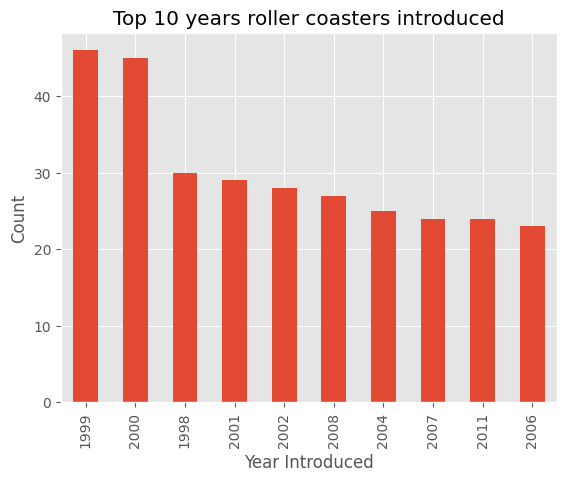

In [142]:
# Plotting
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title = 'Top 10 years roller coasters introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

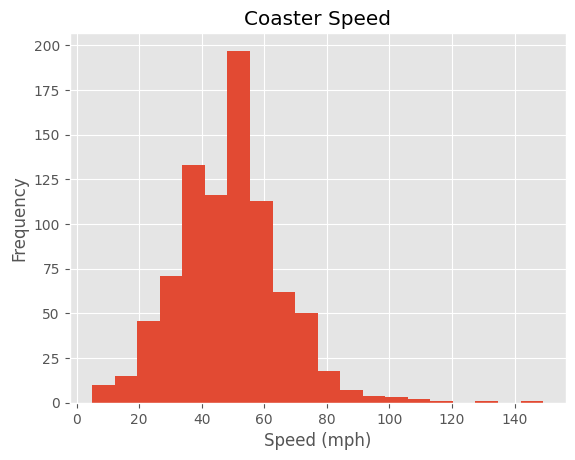

In [152]:
# Look out for such distribution for every feature
ax = df['Speed_mph']\
    .plot(kind='hist', bins=20, title='Coaster Speed', xlabel='Speed (mph)', ylabel='Frequency') # Bins = the number (or boundaries) of bars used to group continuous data. Here, splits data into 20 equal bins

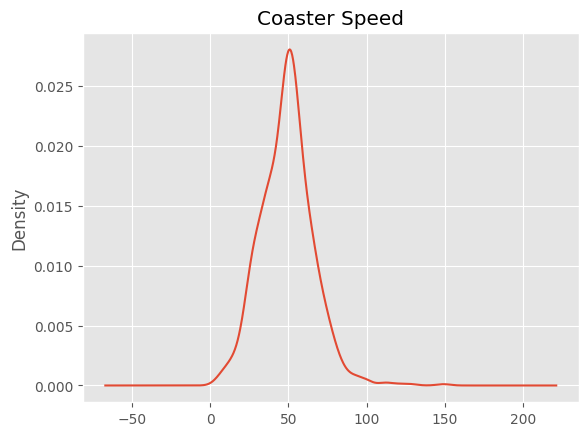

In [156]:
# Using KDE
ax = df['Speed_mph']\
    .plot(kind='kde',title='Coaster Speed', xlabel='Speed (mph)', ylabel='Frequency') # Bins = the number (or boundaries) of bars used to group continuous data. Here, splits data into 20 equal bins

### Step 04: Feature Relationships
- Scatter plot
- Heatmap correlation
- Pairplot
- Groupby Comparisons

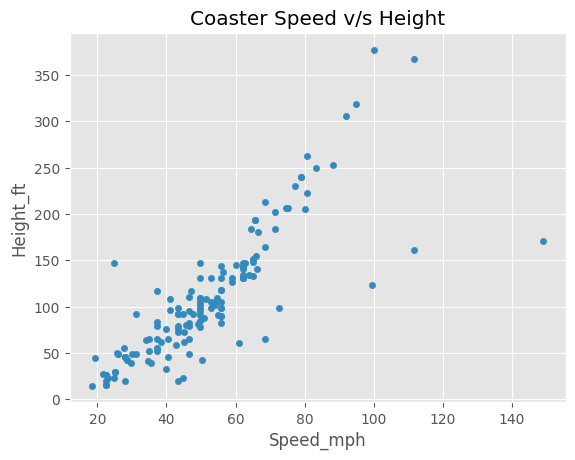

In [163]:
df.plot(kind='scatter', x='Speed_mph', y='Height_ft', title='Coaster Speed v/s Height')  #This makes a matplotlib object
plt.show() # This shows it (others are merely returning it)

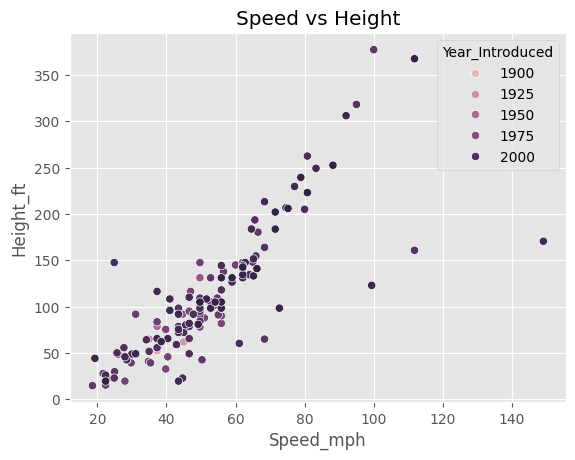

In [168]:
sb.scatterplot(
    data = df,
    x = 'Speed_mph',
    y = 'Height_ft',
    hue = 'Year_Introduced')
plt.title('Speed vs Height')
plt.show()

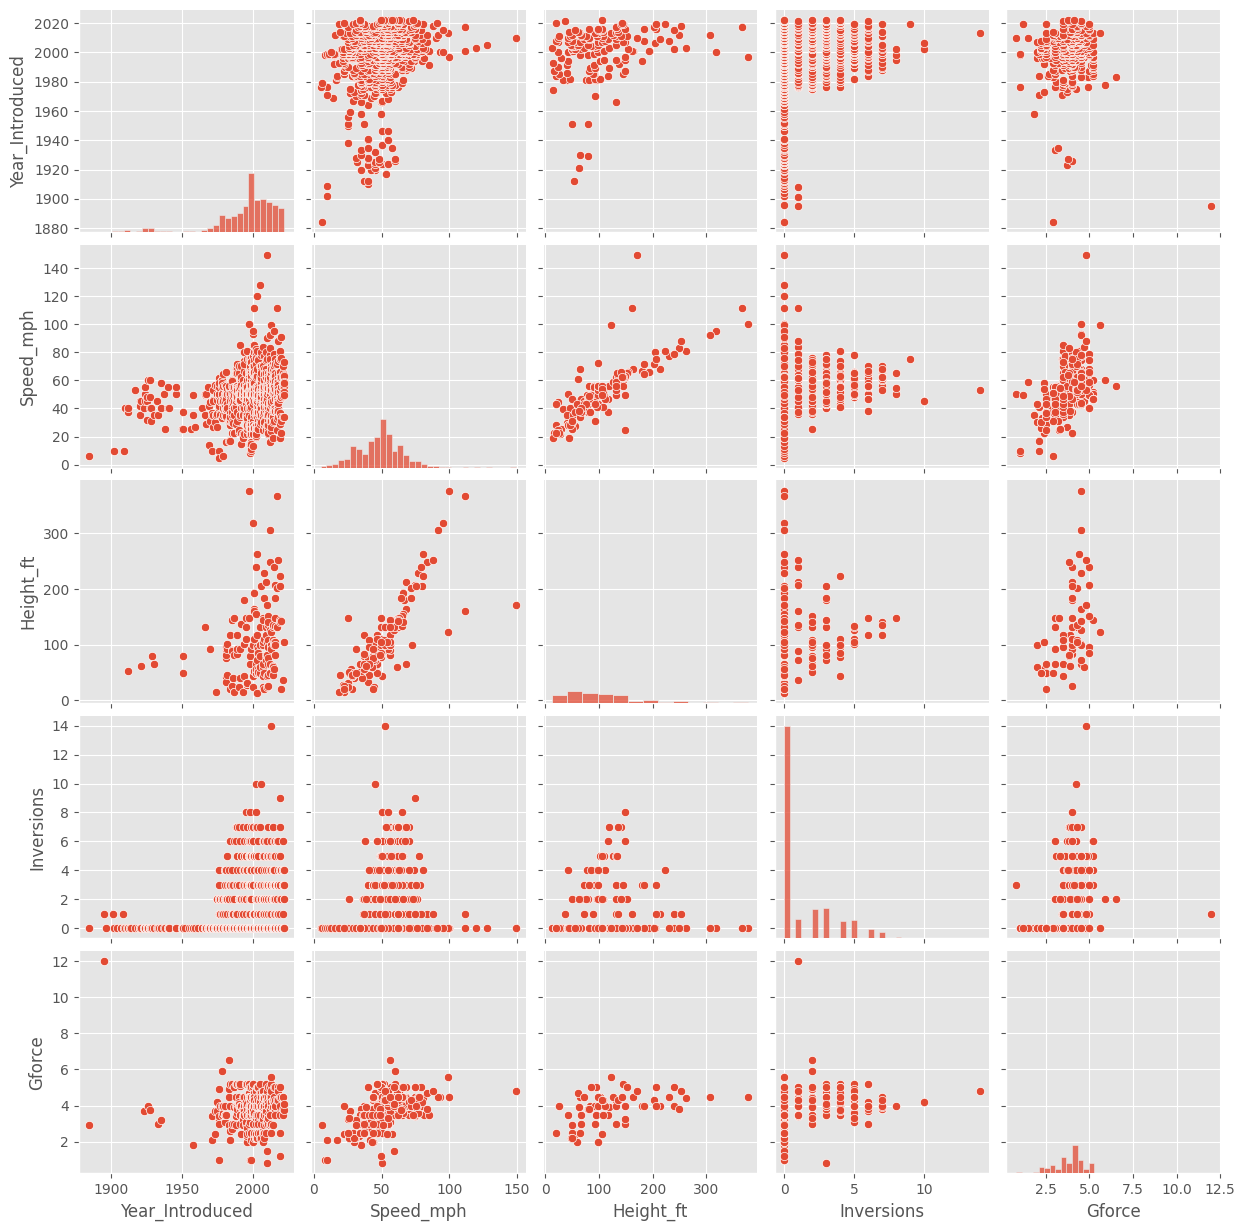

In [ ]:
sb.pairplot(
    data = df,
    vars = ['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']
)
plt.show() # We are able to compare all combinations against each other

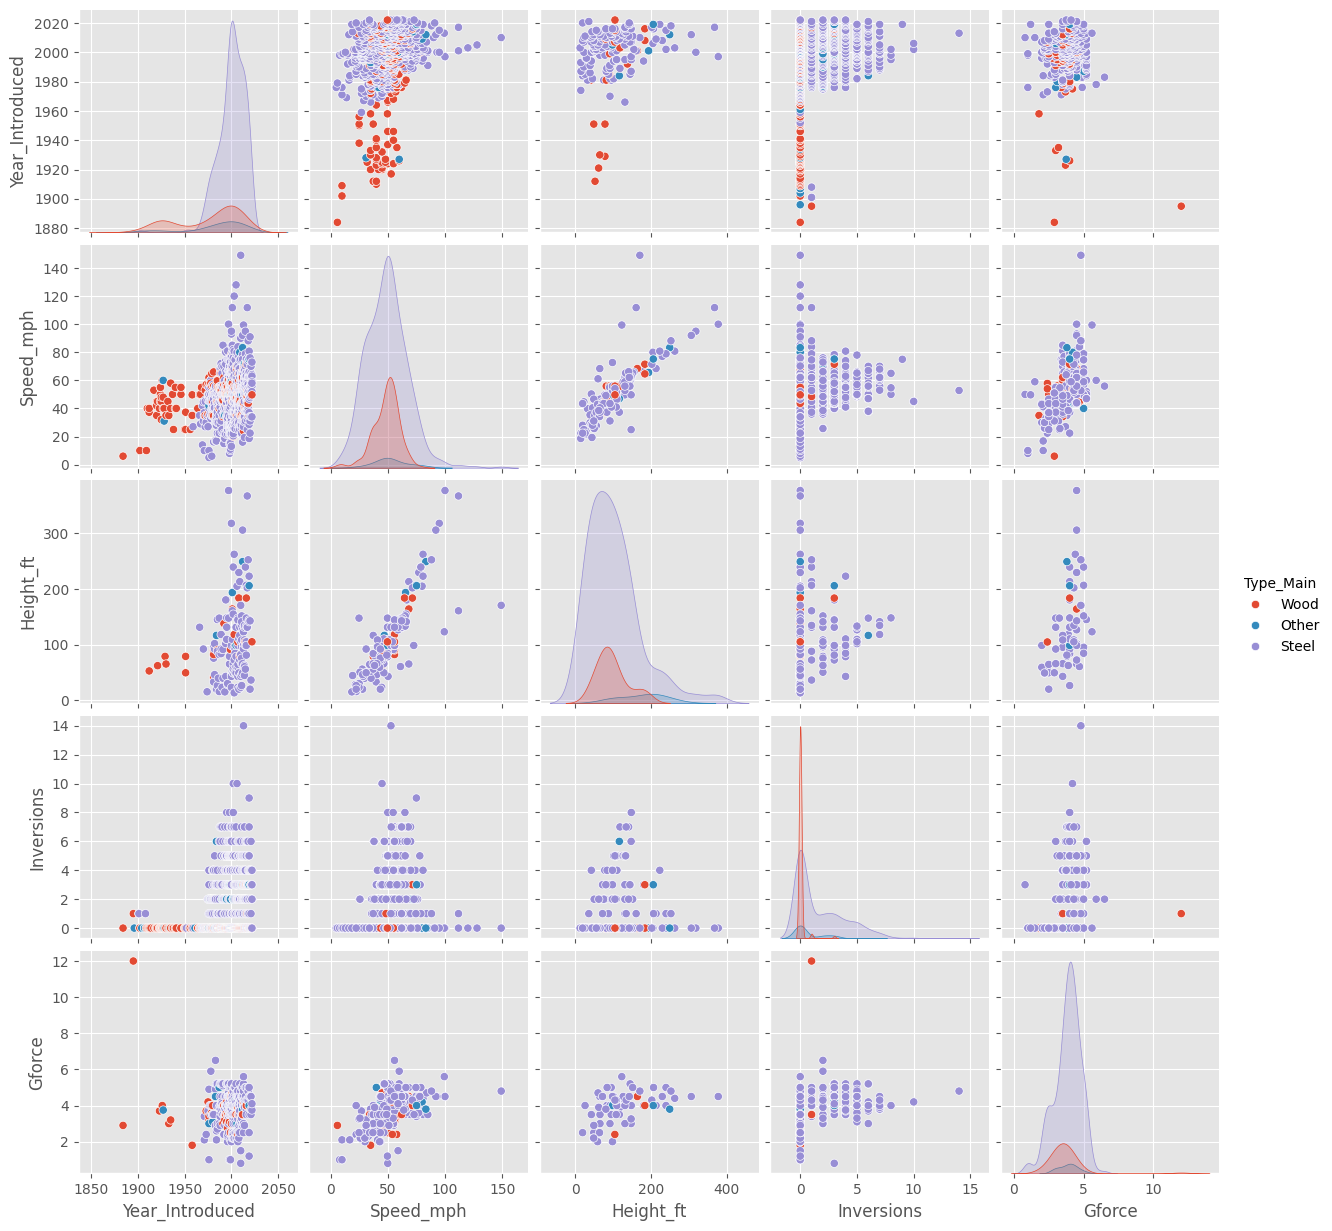

In [171]:
sb.pairplot(
    data = df,
    hue='Type_Main',
    vars = ['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']
)
plt.show() # We are able to compare all combinations against each other

In [175]:
# To see correlation
df_corr = df[['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

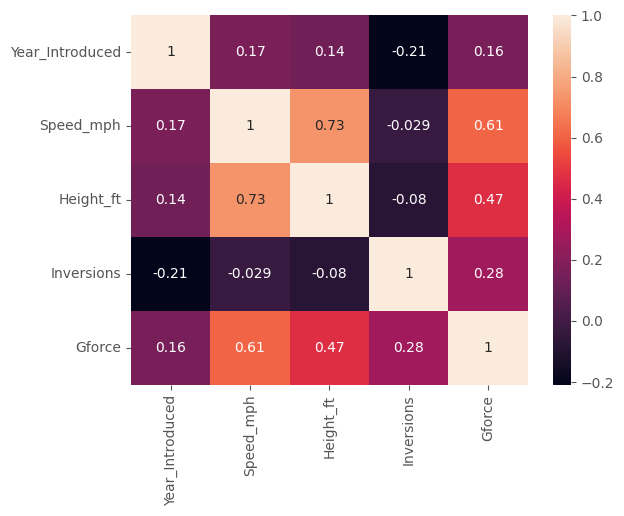

In [176]:
sb.heatmap(df_corr, annot=True)

### Step 05: Question to ask
- Try to answer a question you have about the data using plot or statistic

**What are the locations with the slowest roller coasters (minimum of 10)**

<Axes: title={'center': 'Locations with the slowest roller coasters'}, xlabel='Avg coaster speed', ylabel='Location'>

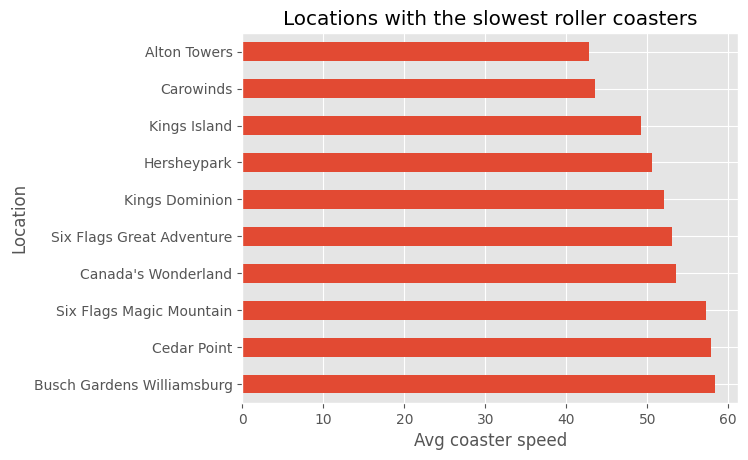

In [185]:
df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values('mean', ascending=False)['mean'] \
    .plot(kind='barh', title="Locations with the slowest roller coasters", xlabel='Avg coaster speed')